## European Restaurant Reviews
Reviews of various European restaurants by customers.
This dataset contains customer reviews for various restaurants, divided into positive and negative sentiments. Reviews are crucial for each restaurant’s reputation and are updated daily.

https://www.kaggle.com/datasets/gorororororo23/european-restaurant-reviews

In [2]:
import os
print(os.getcwd())

C:\Users\HENNY PURWADI\PYTHON\FT_Embed\FineTune_Embed


In [4]:
# Standard libraries
import re
from collections import defaultdict
from string import punctuation

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 160)

# Natural Language Processing (NLP)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.util import bigrams, trigrams, ngrams
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer

# Download necessary NLTK data
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

# Set stop words
stop_words = set(stopwords.words('english'))

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import joblib
import pickle
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to C:\Users\HENNY
[nltk_data]     PURWADI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HENNY
[nltk_data]     PURWADI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\HENNY
[nltk_data]     PURWADI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# Read CSV file
df = pd.read_csv('./data/Reviews.csv')
df.head(2)

,Sentiment,Label,Review
0,Negative,0,Rude managerThe manager became agressive when I said the carbonara was not good. She was rude. It was a very bad experience. The worst in Rome in many years.
1,Negative,0,"A big disappointmentI ordered a beef fillet ask to be done medium, I got it well done cooked and very dry, when I told them they took the steak and after 20..."


In [10]:
len(df)

1502

In [12]:
df.columns

Index(['Sentiment', 'Label', 'Review'], dtype='object')

In [14]:
#Find unique values in df['Sentiment'] 
unique_Sentiment= df['Sentiment'] .unique()
print(unique_Sentiment)

['Negative' 'Positive']


In [16]:
df_Sentiment_counts = df['Sentiment'].value_counts()
df_Sentiment_counts

Sentiment
Positive    1237
Negative     265
Name: count, dtype: int64

### There is an imbalanced dataset of sentiments between Positive and Negative

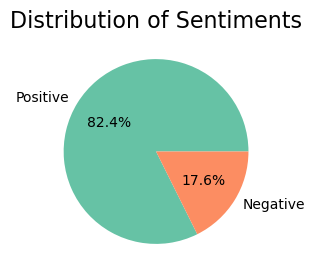

In [19]:
plt.figure(figsize=(3, 3))
plt.pie(df_Sentiment_counts, labels=df_Sentiment_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Sentiments', fontsize=16)
plt.show()

In [21]:
# Map sentiment labels to numerical values
df['Label'] = df['Sentiment'].map({'Positive': 1,'Negative': 0,})
df.iloc[128:132]

,Sentiment,Label,Review
128,Negative,0,Overrated and touristyUnfortunately the food was just average. No dish was really convincing. The greeting from the kitchen was okay but not a highlight in ...
129,Negative,0,Bad tasting food difficult to digestWe didn't like the food that much.\n\nThe starters were tasteless\n\nand hard to digest.\n\nThe pasta was nothing specia...
130,Negative,0,"Pretty dissappointing.I actually never write reviews for the restaurants, but for this one i just had to. The reason we decided to check this place out was ..."
131,Negative,0,SorryI'm afraid we were very let down by this restaurant.\nWe were left standing at the door for 5 minutes before being seated. We decided on the tasting me...


## Data Cleaning

In [24]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', text)
    # Remove punctuation
    text = re.sub(r'[' + punctuation + ']', ' ', text)
    # Remove hashtags
    text = re.sub(r'#(\w+)', ' ', text)
    # Remove mentions
    text = re.sub(r'@(\w+)', ' ', text)
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    return ' '.join(tokens)

def clean_text2(text):
    # Remove URLs
    text = re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', text)
    # Remove punctuation
    text = re.sub(r'[' + punctuation + ']', ' ', text)
    # Remove hashtags
    text = re.sub(r'#(\w+)', ' ', text)
    # Remove mentions
    text = re.sub(r'@(\w+)', ' ', text)
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    # Lemmatize and stem the tokens
    lemmatizer = WordNetLemmatizer()
    stems = [lemmatizer.lemmatize(t) for t in tokens]
    stemmer = PorterStemmer()
    stems = [stemmer.stem(t) for t in stems]    
    return ' '.join(stems)

def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    
    return tokens

In [26]:
df['CleanedReview'] = df['Review'].apply(clean_text2)
df[['Sentiment','Label','Review','CleanedReview']].iloc[128:132]

,Sentiment,Label,Review,CleanedReview
128,Negative,0,Overrated and touristyUnfortunately the food was just average. No dish was really convincing. The greeting from the kitchen was okay but not a highlight in ...,overr and touristyunfortun the food wa just averag no dish wa realli convinc the greet from the kitchen wa okay but not a highlight in term of tast the tart...
129,Negative,0,Bad tasting food difficult to digestWe didn't like the food that much.\n\nThe starters were tasteless\n\nand hard to digest.\n\nThe pasta was nothing specia...,bad tast food difficult to digestw didn t like the food that much the starter were tasteless and hard to digest the pasta wa noth special the main cours wa ...
130,Negative,0,"Pretty dissappointing.I actually never write reviews for the restaurants, but for this one i just had to. The reason we decided to check this place out was ...",pretti dissappoint i actual never write review for the restaur but for thi one i just had to the reason we decid to check thi place out wa onli becaus of hi...
131,Negative,0,SorryI'm afraid we were very let down by this restaurant.\nWe were left standing at the door for 5 minutes before being seated. We decided on the tasting me...,sorryi m afraid we were veri let down by thi restaur we were left stand at the door for 5 minut befor be seat we decid on the tast menu for land with wine a...


In [28]:
# Select the necessary columns
df = df[["Sentiment", "Label","CleanedReview"]]

# Save the DataFrame to a CSV file
df.to_csv('./data/CleanedReviews.csv', index=False)

In [30]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./data/CleanedReviews.csv')
df.head(2)

,Sentiment,Label,CleanedReview
0,Negative,0,rude managerth manag becam agress when i said the carbonara wa not good she wa rude it wa a veri bad experi the worst in rome in mani year
1,Negative,0,a big disappointmenti order a beef fillet ask to be done medium i got it well done cook and veri dri when i told them they took the steak and after 20 minut...


## Vectorizer tf-idf

In [32]:
cv = TfidfVectorizer(lowercase=True, preprocessor=clean_text, ngram_range=(1, 3), tokenizer=tokenize)

text_counts = cv.fit_transform(df['CleanedReview'].values.astype('U'))

## Split into training and testing data

In [37]:
x_train,x_test,y_train,y_test =train_test_split(text_counts, df['Label'],stratify=df['Label'],random_state=42,test_size=0.3)

## Evaluate Models

In [39]:
# Performance evaluation function
def performance_evaluation(y_test, y_pred, df):
    # Classification report
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
    # Confusion matrix    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("")
    
    # Normalized Confusion Matrix
    nconf_matrix = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], 1)
    print(nconf_matrix)    

    # Heatmap images    
    le = LabelEncoder()
    le.fit(df['Label'])
    class_labels = le.classes_
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=class_labels, yticklabels=class_labels, ax=ax1)
    ax1.set_xlabel("Predicted labels")
    ax1.set_ylabel("True labels")
    ax1.set_title("Confusion Matrix")
    sns.heatmap(nconf_matrix, annot=True, cmap=plt.cm.Greens, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, ax=ax2)
    ax2.set_xlabel("Predicted labels")
    ax2.set_ylabel("True labels")
    ax2.set_title("Normalized")
    
    # Add some space between the subplots
    plt.subplots_adjust(wspace=1)

    # Set the aspect ratio to "equal"
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")
    
    plt.show()

## Logistic regression Classifier

In [41]:
# Logistic Regression
clf = LogisticRegression(C=0.2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.8226164079822617

## Logistic regression + L1 Regulation + Cross Validation

In [44]:
clf = LogisticRegression(penalty='l1', solver = 'saga', C=0.2)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L1 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.82464455 0.82380952 0.82380952 0.82380952 0.82380952]
Average Cross Validation Score:  0.8239765290002256
Accuracy with L1 regularization and cross validation:  0.8226164079822617


## Logistic regression + L2 Regulation + Cross Validation

In [47]:
clf = LogisticRegression(penalty='l2', solver = 'lbfgs', C=0.3)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy with L2 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.82464455 0.82380952 0.82380952 0.82380952 0.82380952]
Average Cross Validation Score:  0.8239765290002256
Accuracy with L2 regularization and cross validation:  0.8226164079822617


In [49]:
#SAVE MODEL
def train_models():
    file = open('./data/vectorizer.pkl','wb')
    joblib.dump(cv, file)
    file.close()

    file = open('./data/model.pkl','wb')
    joblib.dump(clf, file)
    file.close()
    
    print("Models saved")
    
train_models()

Models saved


## Comparing accuracy of train and test data to know whether the model is overfitting or underfitting

Train score for iteration 1: 0.8239771646051379
Test score for iteration 1: 0.8226164079822617
Train score for iteration 2: 0.8239771646051379
Test score for iteration 2: 0.8226164079822617
Train score for iteration 3: 0.8239771646051379
Test score for iteration 3: 0.8226164079822617
Train score for iteration 4: 0.8239771646051379
Test score for iteration 4: 0.8226164079822617
Train score for iteration 5: 0.8239771646051379
Test score for iteration 5: 0.8226164079822617


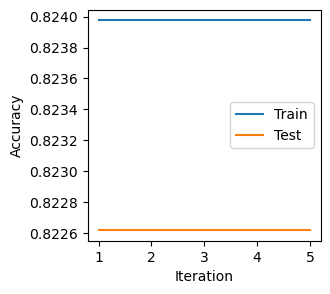

In [51]:
train_scores = []
test_scores = []

# Compare accuracy scores for each iteration
for i in range(1, 6):
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"Train score for iteration {i}: {train_score}")
    print(f"Test score for iteration {i}: {test_score}")

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(range(1, 6), train_scores, label='Train')
ax.plot(range(1, 6), test_scores, label='Test')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

In [53]:
#LOAD MODEL

def load_models():         
    # Load the vectorizer.
    file = open('./data/vectorizer.pkl', 'rb')
    vectorizer = joblib.load(file)
    file.close()
    
    # Load the LR Model.
    file = open('./data/model.pkl', 'rb')
    model = joblib.load(file)
    file.close()
    
    return vectorizer, model

vectorizer, model = load_models()

In [62]:
# Make predictions
user_input = input("Enter your message:")
clean_input = clean_text(user_input)
input_counts = vectorizer.transform([clean_input])
prediction = model.predict(input_counts)
print('Prediction:', 'Positive' if prediction == 1 else 'Negative')

Enter your message: The food tastes bad


Prediction: Positive


##### The model predicted wrongly

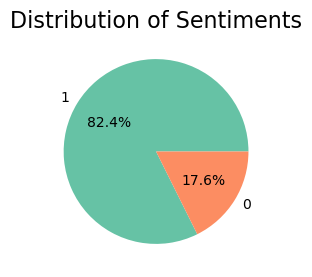

In [66]:
df_Label_counts = df['Label'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(df_Label_counts, labels=df_Label_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Distribution of Sentiments', fontsize=16)
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.82      1.00      0.90       371

    accuracy                           0.82       451
   macro avg       0.41      0.50      0.45       451
weighted avg       0.68      0.82      0.74       451

[[  0  80]
 [  0 371]]

[[0. 1.]
 [0. 1.]]


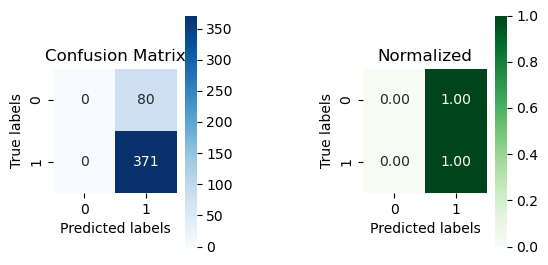

In [68]:
# Evaluate the model performance
performance_evaluation(y_test, y_pred, df)

## Interpretation:

100% of class 0  were incorrectly classified as class 1, and 100% of class 1 instances were correctly classified as class 1 (1.0).

The model performs well for class 1 (Positive) with high precision, recall, and F1-score.

The model fails to identify any instances of class 0 (Negative), resulting in a precision, recall, and F1-score of 0 for this class.

The overall accuracy is driven by the high performance on class 1, but the performance on class 0 is poor.

**This suggests a significant class imbalance problem, where the model has likely learned to predict the majority class (class 1) and ignore minority class (class 0)**

## Balancing with SMOTE (Synthetic Minority Over-sampling Technique) 

In [100]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(text_counts, df['Label'])

In [102]:
# Split the balanced data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x_balanced, y_balanced, stratify=y_balanced, random_state=42, test_size=0.3)

In [104]:
# Train a logistic regression classifier
balanced_clf = LogisticRegression(penalty='l2', solver='lbfgs', C=0.3)
scores = cross_val_score(balanced_clf, x_train, y_train, cv=6)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

balanced_clf.fit(x_train, y_train)
y_pred = balanced_clf.predict(x_test)
print("Accuracy with L2 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.93079585 0.88235294 0.92041522 0.90972222 0.92361111 0.92013889]
Average Cross Validation Score:  0.9145060393438422
Accuracy with L2 regularization and cross validation:  0.9259757738896366


##### The accuracy improved after oversampling balancing with SMOTE

In [107]:
# Performance evaluation function
def performance_evaluation(y_test, y_pred):
    # Classification report
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
    # Confusion matrix    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("")
    
    # Normalized Confusion Matrix
    nconf_matrix = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], 1)
    print(nconf_matrix)    

    # Heatmap images    
    le = LabelEncoder()
    le.fit(df['Label'])
    class_labels = le.classes_
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=class_labels, yticklabels=class_labels, ax=ax1)
    ax1.set_xlabel("Predicted labels")
    ax1.set_ylabel("True labels")
    ax1.set_title("Confusion Matrix")
    sns.heatmap(nconf_matrix, annot=True, cmap=plt.cm.Greens, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, ax=ax2)
    ax2.set_xlabel("Predicted labels")
    ax2.set_ylabel("True labels")
    ax2.set_title("Normalized")
    
    # Add some space between the subplots
    plt.subplots_adjust(wspace=1)

    # Set the aspect ratio to "equal"
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")
    
    plt.show()

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       372
           1       0.87      0.99      0.93       371

    accuracy                           0.93       743
   macro avg       0.93      0.93      0.93       743
weighted avg       0.93      0.93      0.93       743

[[319  53]
 [  2 369]]

[[0.9 0.1]
 [0.  1. ]]


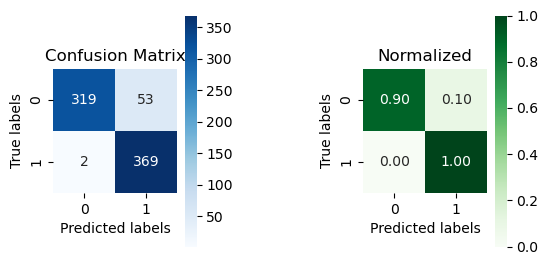

In [109]:
# Evaluate the model performance
performance_evaluation(y_test, y_pred)

In [125]:
# Save the model and vectorizer
with open('./data/balance_clf_model.pkl', 'wb') as file:
    pickle.dump(balanced_clf, file)
with open('./data/balance_clf_vectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)

def load_balance_clf_models():
    with open('./data/balance_clf_model.pkl', 'rb') as file:
        balance_clf_model = pickle.load(file)
    with open('./data/balance_clf_vectorizer.pkl', 'rb') as file:
        balance_clf_vectorizer = pickle.load(file)
    return balance_clf_model, balance_clf_vectorizer    
    
print("balance_clf_models and balance_clf_vectorizer saved...")

balance_clf_models and balance_clf_vectorizer saved...


In [127]:
# Load the model and vectorizer
balanced_clf_model, balanced_clf_vectorizer = load_balance_clf_models()

In [141]:
# Function to predict user input
def predict2():
    user_input = input("Enter your message: ")
    clean_input = clean_text(user_input)
    input_counts = balanced_clf_vectorizer.transform([clean_input])
    
    prediction = balanced_clf_model.predict(input_counts)
    print('Prediction:', 'Positive' if prediction == 1 else 'Negative')

In [143]:
predict2()

Enter your message:  The food tastes bad


Prediction: Positive


In [145]:
predict2()

Enter your message:  The manager was rude


Prediction: Positive


##### The model continues to make incorrect predictions on new data, although all performance evaluations indicating good results.

### Get embeddings from the dataset using OpenAI's 'text-embedding-3-small' model


In [111]:
!pip install -qqq --upgrade openai
!pip install -qqq datasets tiktoken 
!pip install -qqq utils
!pip install -qqq scikit-learn

In [149]:
import openai
from openai import OpenAI
import tiktoken
from collections import defaultdict

In [151]:
embedding_model = "text-embedding-3-small"
embedding_encoding = "cl100k_base"
max_tokens = 8000  # the maximum for text-embedding-3-small is 8191

In [153]:
len(df)

1502

In [155]:
df.head(2)

,Sentiment,Label,CleanedReview
0,Negative,0,rude managerth manag becam agress when i said the carbonara wa not good she wa rude it wa a veri bad experi the worst in rome in mani year
1,Negative,0,a big disappointmenti order a beef fillet ask to be done medium i got it well done cook and veri dri when i told them they took the steak and after 20 minut...


In [157]:
top_n = 1453
encoding = tiktoken.get_encoding(embedding_encoding)

# omit reviews that are too long to embed
df["n_tokens"] = df.CleanedReview.apply(lambda x: len(encoding.encode(x)))
df = df[df.n_tokens <= max_tokens].tail(top_n)
len(df)

1453

In [159]:
df.head(2)

,Sentiment,Label,CleanedReview,n_tokens
49,Negative,0,disappointedit s our last night in rome found thi highli rate restaur from trip advis had high expect for the last fine dine in rome the gaja wine wa excel ...,105
50,Negative,0,slow slow slow thi wa our 3rd visit to ad hoc and it will be the last one too we had book a tabl at 8 00 p m a month in advanc and request a tabl in the roo...,378


In [167]:
openai.api_key = 'sk-xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
# Create an OpenAI client
client = openai

In [171]:
# Function to get embeddings from OpenAI
def get_embedding(text, model = embedding_model):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding

# Apply the embedding function to the 'combined' column
df['embedding'] = df['CleanedReview'].apply(lambda x: get_embedding(x, model = embedding_model))
df.to_csv('./data/embedded_CleanedReviews.csv', index=False)

In [137]:
a = get_embedding("hi", model = embedding_model)

## To load the data from a saved file

In [173]:
df = pd.read_csv('./data/embedded_CleanedReviews.csv')
df.head(2)

,Sentiment,Label,CleanedReview,n_tokens,embedding
0,Negative,0,disappointedit s our last night in rome found thi highli rate restaur from trip advis had high expect for the last fine dine in rome the gaja wine wa excel ...,105,"[-0.030016716569662094, 0.013711179606616497, -0.03178087994456291, -0.05671265721321106, -0.012426973320543766, -0.04431162774562836, -0.002394916256889701..."
1,Negative,0,slow slow slow thi wa our 3rd visit to ad hoc and it will be the last one too we had book a tabl at 8 00 p m a month in advanc and request a tabl in the roo...,378,"[-0.043122150003910065, 0.005421386566013098, -0.026180317625403404, -0.06472471356391907, -0.01459072157740593, -0.02550264447927475, -0.030592110008001328..."


In [175]:
df['embedding'] = df.embedding.apply(eval).apply(np.array)
df['embedding'][0]

array([-0.03001672,  0.01371118, -0.03178088, ...,  0.01614988,
        0.01451543, -0.02635867])

## Apply SMOTE to balance the Embedded dataset

In [178]:
x = np.vstack(df['embedding'].values)
y = df['Label'].values

## Prepare embedding data for training

In [181]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [183]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [185]:
clf_embed = LogisticRegression(penalty='l1', solver = 'saga', C=0.2)
scores = cross_val_score(clf_embed, x_train_balanced, y_train_balanced, cv=5)
print("Cross Validation Scores: ", scores)
print("Average Cross Validation Score: ", np.mean(scores))

clf_embed .fit(x_train_balanced, y_train_balanced)
y_pred=clf_embed.predict(x_test)
print("Accuracy with L1 regularization and cross validation: ", metrics.accuracy_score(y_test, y_pred))

Cross Validation Scores:  [0.93654822 0.97208122 0.94162437 0.94670051 0.96192893]
Average Cross Validation Score:  0.9517766497461929
Accuracy with L1 regularization and cross validation:  0.9484536082474226


In [186]:
# Predict on the test set
y_pred = clf_embed .predict(x_test)

# Print the predictions
print('Prediction:', y_pred)

Prediction: [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [189]:
# Performance evaluation function
def performance_evaluation(y_test, y_pred, df):
    # Classification report
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
    # Confusion matrix    
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    print("")
    
    # Normalized Confusion Matrix
    nconf_matrix = np.round(conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis], 1)
    print(nconf_matrix)    

    # Heatmap images    
    le = LabelEncoder()
    le.fit(df['Label'])
    class_labels = le.classes_
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
    sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=class_labels, yticklabels=class_labels, ax=ax1)
    ax1.set_xlabel("Predicted labels")
    ax1.set_ylabel("True labels")
    ax1.set_title("Confusion Matrix")
    sns.heatmap(nconf_matrix, annot=True, cmap=plt.cm.Greens, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, ax=ax2)
    ax2.set_xlabel("Predicted labels")
    ax2.set_ylabel("True labels")
    ax2.set_title("Normalized")
    
    # Add some space between the subplots
    plt.subplots_adjust(wspace=1)

    # Set the aspect ratio to "equal"
    ax1.set_aspect("equal")
    ax2.set_aspect("equal")
    
    plt.show()

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.98      0.96      0.97       252

    accuracy                           0.95       291
   macro avg       0.88      0.92      0.89       291
weighted avg       0.95      0.95      0.95       291

[[ 34   5]
 [ 10 242]]

[[0.9 0.1]
 [0.  1. ]]


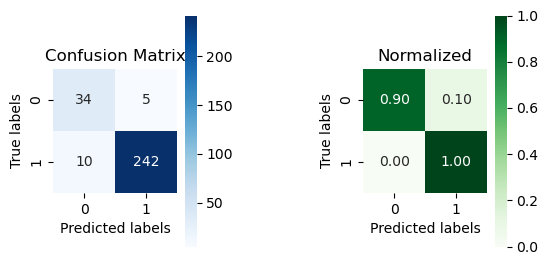

In [191]:
# Evaluate the model performance
performance_evaluation(y_test, y_pred, df)

## Save the model and vectorizer

In [198]:
with open('./data/clf_embed.pkl', 'wb') as file:
    pickle.dump(clf_embed , file)

# Save the embeddings and labels
with open('./data/clf_embed_vectorizer.pkl', 'wb') as file:
    pickle.dump((x_train_balanced, y_train_balanced), file)

print("Model Saved")

Model Saved


## Load Models

In [201]:
def load_clf_embed_models():
    with open('./data/clf_embed.pkl', 'rb') as file:
        clf_embed = pickle.load(file)
    with open('./data/clf_embed_vectorizer.pkl', 'rb') as file:
        x_train_balanced, y_train_balanced = pickle.load(file)
    return clf_embed 

In [203]:
loaded_clf_embed_model = load_clf_embed_models()

## Make predictions with embeddings

In [205]:
# Function to predict user input
def clf_embed_predict():
    user_input = input("Enter your message: ")
    clean_input = clean_text(user_input)
    input_embedding = np.array(get_embedding(clean_input, model=embedding_model))
    input_embedding = input_embedding.reshape(1, -1)  # Reshape for prediction
    
    prediction = loaded_clf_embed_model.predict(input_embedding)
    print('Prediction:', 'Positive' if prediction == 1 else 'Negative')

In [207]:
clf_embed_predict()

Enter your message:  The manager was rude


Prediction: Negative


In [209]:
clf_embed_predict()

Enter your message:  The food was bad


Prediction: Negative


In [211]:
clf_embed_predict()

Enter your message:  The appetizer was delicious


Prediction: Positive


In [213]:
clf_embed_predict()

Enter your message:  The wine is super


Prediction: Positive


### After applying embeddings, the model can now accurately predict the sentiment.